In [1]:
import cifar10
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

print(tf.__version__)

2.6.0


In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_ = class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [26]:
images_train_g = images_train

In [27]:
images_test_g = images_test
images_test_g.shape

(10000, 32, 32, 3)

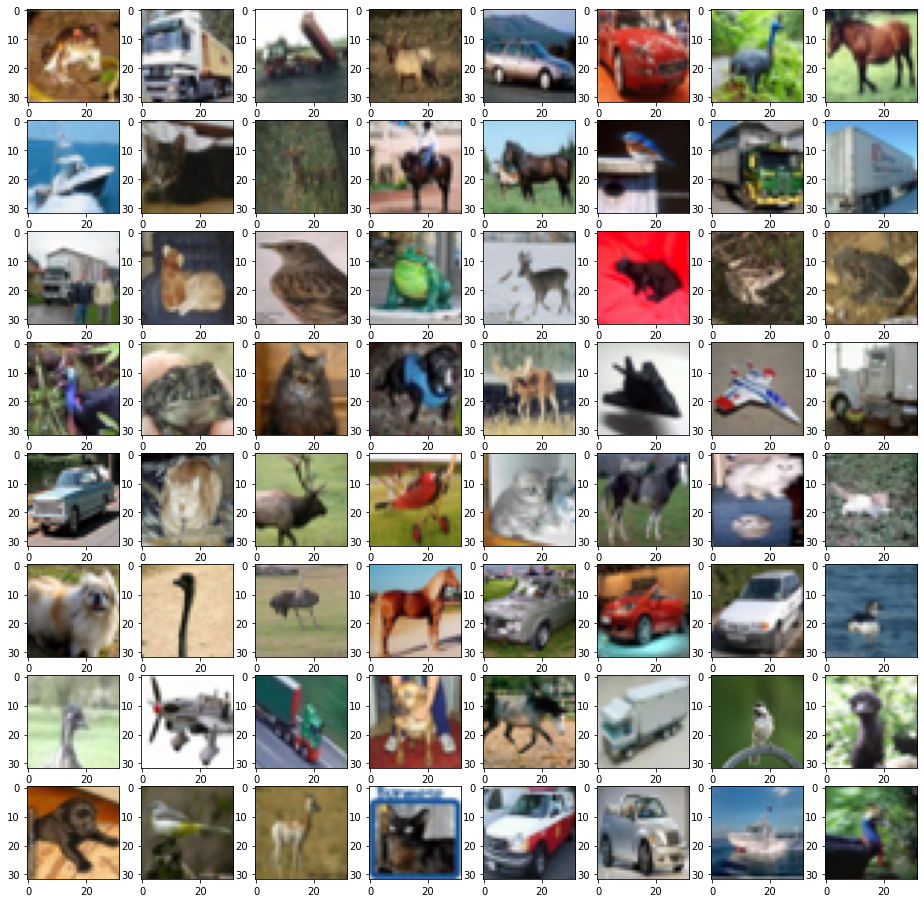

In [28]:
fig = plt.figure(figsize=(16,16))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(images_train_g[i])
plt.show()

In [29]:
x_train = images_train_g.reshape(50000,32,32,3)/255
y_train = labels_train
x_test = images_test_g.reshape(10000, 32,32,3)/255
y_test = labels_test

In [30]:
batch_size = 32
num_classes = 10
epochs = 50

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])

In [32]:
history = model.fit(x_train, y_train, batch_size=batch_size,
                    epochs=epochs)

Epoch 1/50
1563/1563 [==============================] - 25s 7ms/step - loss: 2.1424 - acc: 0.2110
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9907 - acc: 0.2832
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9043 - acc: 0.3168
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8270 - acc: 0.3458
Epoch 5/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.7480 - acc: 0.3706
Epoch 6/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6898 - acc: 0.3896
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6407 - acc: 0.4075
Epoch 8/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5965 - acc: 0.4224
Epoch 9/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5590 - acc: 0.4371
Epoch 10/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5295 - acc: 0.4491
Epoch 11/50
1563/15

In [36]:
y_pred = model.predict(x_test)

In [37]:
np.savetxt("CIFAR_10.csv", y_pred,delimiter=',',fmt='%s')

In [38]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9771 - acc: 0.6756


In [39]:
# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)

In [40]:
y_true 

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)